In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator
import os

import sklearn
from sklearn.utils import shuffle

from tensorflow import keras
from tensorflow.keras import layers

import copy

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

p = 50

# the data, split between train and test sets
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)

# Two Initial Methods for CNN

## One is an initial method of data augmentation
## second is an initial method of committe vote

# The advantages of our new data augmenation 

1. Use random multiple original inputs to create one new data (stochastic)

2. Create new data based on each category instead of the whole new dataset to imporve feature extraction (classify)

3. New data can be randomly selected to create another new data (self-adaptive)

4. Focus on feature extraction to create new data (committe vote)

5. Give multiple tune parameters to find best new data (tune parameter)

# The disadvantaged of our new data augmentation

## Slightly complex to implement

1. Seperate each class

2. Create and tune paramaters on each class data

# The steps used to test it on written digit number

1. Separate each class data and subset each class to reduce data size showing augmentation performance

2. Generate new data based for each 10 classes then combine, shuffle them

3. train new data using CNN and evaluate results with some regularization methods

In [2]:
def generator(dataset, num = 0, S = 50, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    cla = dataset
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    #plt.imshow(new)
    return new 

In [2]:
def generator(num = 0, S = 9, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    cla = X_train[y_train == num, :, :, :] # generate the class
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    
    for i in range(0, S):
        plt.subplot(330 + 1 + i)
        plt.imshow(basis[i])
    # show the plot
    plt.show()
    plt.imshow(new)
    #return new

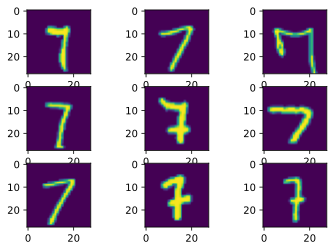

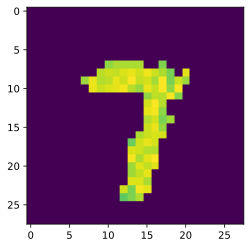

In [7]:
generator(num = 7, S = 9, p = 0.3, thre = 140)